In [2]:
import pandas as pd
import seaborn as sns

In [3]:
WineQualityDf = pd.read_csv("../data/WineQualityDf_cleaned.csv")
WineQualityDf = WineQualityDf.drop("Unnamed: 0", axis=1)

WineQualityDf


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1354,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1355,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1356,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1357,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
correlations = []
for i in WineQualityDf.columns:
    cor_row = []
    for j in WineQualityDf.columns:

        x = WineQualityDf[i].to_numpy()
        y = WineQualityDf[j].to_numpy()

        x_mean = x.mean()
        y_mean = y.mean()
        
        corr_coefficient = sum((x_i - x_mean) * (y_i - y_mean) for x_i, y_i in zip(x, y)) / ((sum((x - x_mean)**2) * sum((y-y_mean)**2))**0.5)

        cor_row.append(corr_coefficient)
    correlations.append(cor_row)

correlations

[[1.0,
  -0.2551244649611133,
  0.6674373845302937,
  0.11102546657569842,
  0.08588624707137703,
  -0.1405800178991544,
  -0.10377679525816128,
  0.6701950166538079,
  -0.6866851055982779,
  0.19026947686015405,
  -0.06159614928102003,
  0.11902366561349692],
 [-0.2551244649611133,
  1.0,
  -0.5512480416642108,
  -0.002448889104656102,
  0.055153670146704394,
  -0.020944843192447802,
  0.07170106105310393,
  0.02394294372741832,
  0.24711113166358542,
  -0.25694777065029833,
  -0.19781221737258675,
  -0.3952136890098377],
 [0.6674373845302937,
  -0.5512480416642108,
  1.0,
  0.14389178736659244,
  0.2101945338853937,
  -0.048004466475120355,
  0.047357608598901445,
  0.35796188864682393,
  -0.5503097645056645,
  0.3260623332275637,
  0.10510809321904395,
  0.2280574591992979],
 [0.11102546657569842,
  -0.002448889104656102,
  0.14389178736659244,
  1.0,
  0.026656141384021927,
  0.16052715297142878,
  0.20103849217186145,
  0.32452248354025265,
  -0.08314348370890855,
  -0.01183657212

<Axes: >

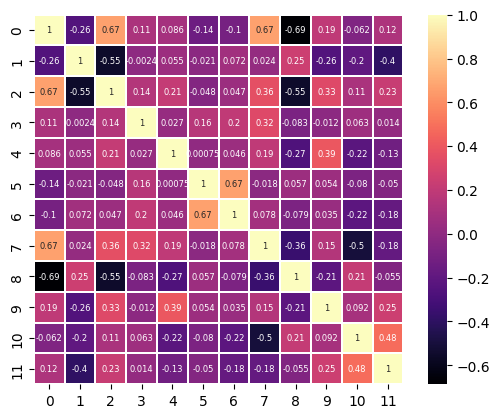

In [5]:
sns.heatmap(
    correlations,
    square=True,
    cmap="magma",
    linewidths=0.1,
    annot=True,
    annot_kws={"fontsize":6}
)

In [6]:
high_corr_matrix = []
for i in range(len(correlations)):
    for j in range(len(correlations)):
        if abs(correlations[i][j]) > 0.8 and abs(correlations[i][j]) < 1:
            high_corr_matrix.append(True)
            print(correlations[i][j])

high_corr_matrix

[]

# No high multicollinearity found in data